# Hub Bespoke Figures
**First Figure**
Strong inputs to oviIN output strongly to oviIN 

Is there a hub and spoke structure to oviIN's connectome? This part of the notebook is to find out if oviIN's strongest inputs also have oviIN as their strongest output.

One can imagine that oviIN could just be a promiscuous neuron that gets a little bit of input from a lot of things. It could be an afterthought to all of its strongest inputs. One the other hand, its strongest inputs might exist to send strong outputs to oviIN. 

1. Import oviIN_r inputs
2. Find where oviIN ranks in the outputs of each input neuron
3. Create primary, secondary etc groups based on distribution
4. Plot groups

**Second Figure** 
Breakdown of known and unknown celltypes in top ROI of oviIN's inputs
1. Pull Synaptic locations for all bodyIds in the oviIN_r's input connectome
2. Merge with modularity data, drop None Types and group by ROI and celltype
3. Filter and label Unknown
4. Plot outer and inner layers of figure

We used the nomenclature presented in Scheffer et al., "A connectome and analysis of the adult Drosophila central brain"

Written by Dr. Gabrielle J Gutierrez and Rhessa Weber Langstaff


In [2]:
from neuprint import Client

auth_token_file = open("flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
    np_client.fetch_version()
except:
    np_client = None

In [3]:
# import important stuff here
import numpy as np
import pandas as pd
from neuprint import fetch_simple_connections, fetch_synapse_connections, NeuronCriteria as NC, fetch_neurons

In [4]:
# load package
import matplotlib
import matplotlib as mpl
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'MacOSX', etc.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
%matplotlib inline

# Turn off all warnings, remove to see them
import warnings
warnings.filterwarnings('ignore')

In [5]:
# body IDs of oviINs from Neuprint
oviINr_bodyID = 423101189
oviINl_bodyID = 485934965

In [6]:
# import modularity data (preprocessed_nodes.csv)
mod = pd.read_csv('modularity_runs/0.0/0-0_98765.txt', header=None, sep=' ', names=['id', '0.0'])    
mod

,id,0.0
0,1003215282,1
1,1005952640,2
2,1006928515,3
3,1007260806,3
4,1008024276,4
...,...,...
1827,987117151,2
1828,987273073,6
1829,988567837,5
1830,988909130,5


The modular dataframe is created using data pulled from neuprint (fetch_neurons). This merges all the information needed about each bodyId onto the modularity data.

In [7]:
ovi_inputs_n, conn = fetch_neurons(mod['id'])
ovi_in_merged = pd.merge(mod, ovi_inputs_n, how='left', left_on='id', right_on='bodyId').drop(columns=['bodyId'])
ovi_in_merged

,id,0.0,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,1003215282,1,CL229_R,CL229,100,439,851,439,89,330447753,Traced,False,Roughly traced,PDM19,301.0,"[23044, 14981, 11600]","{'INP': {'pre': 87, 'post': 351, 'downstream':...",None,"[EPA(R), GOR(R), IB, ICL(R), INP, SCL(R), SMP(...","[GOR(R), IB, ICL(R), INP, SCL(R), SPS(R), VMNP]"
1,1005952640,2,IB058_R,IB058,664,2047,6123,2047,325,1435852519,Traced,False,Roughly traced,PVL20,NaN,None,"{'INP': {'pre': 464, 'post': 1327, 'downstream...",None,"[ATL(R), IB, ICL(R), INP, PLP(R), SPS(R), VLNP...","[ATL(R), IB, ICL(R), INP, PLP(R), SPS(R), VLNP..."
2,1006928515,3,CL300_R,CL300,86,173,636,173,60,222728733,Traced,False,Roughly traced,PVL13,236.0,"[12083, 10523, 16816]","{'INP': {'pre': 79, 'post': 126, 'downstream':...",None,"[ATL(R), IB, ICL(R), INP, SCL(R), SLP(R), SNP(...","[ATL(R), IB, ICL(R), INP, SCL(R), SLP(R), SNP(..."
3,1007260806,3,CL301_R,CL301,119,226,853,226,87,332246609,Traced,False,Roughly traced,PVL13,236.0,"[13524, 10108, 16480]","{'INP': {'pre': 40, 'post': 128, 'downstream':...",None,"[GOR(R), IB, ICL(R), INP, PLP(R), SCL(R), SLP(...","[IB, ICL(R), INP, PLP(R), SCL(R), SLP(R), SNP(..."
4,1008024276,4,FB5N_R,FB5N,499,2011,3175,2011,377,1211500058,Traced,False,Roughly traced,AVM08,472.5,"[19178, 29711, 37312]","{'SNP(L)': {'post': 5, 'upstream': 5, 'mito': ...",SMPCREFB5_4,"[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3...","[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,987117151,2,LAL010_R,LAL010,1206,5629,8793,5629,650,2060716216,Traced,False,Roughly traced,ADM03,292.5,"[15520, 32234, 10016]","{'SNP(R)': {'pre': 2, 'post': 82, 'downstream'...",None,"[CRE(-ROB,-RUB)(R), CRE(R), EPA(R), INP, IPS(R...","[CRE(-ROB,-RUB)(R), CRE(R), EPA(R), INP, IPS(R..."
1828,987273073,6,(PVL05)_L,None,283,164,2680,164,72,213316554,Traced,False,Roughly traced,None,NaN,None,"{'SNP(R)': {'pre': 65, 'post': 52, 'downstream...",None,"[CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(L), CRE(...","[CRE(-ROB,-RUB)(R), CRE(-RUB)(L), CRE(L), CRE(..."
1829,988567837,5,FB4G_R,FB4G,785,3861,5328,3861,465,1567841591,Traced,False,Roughly traced,AVM08,NaN,None,"{'SNP(R)': {'pre': 6, 'post': 73, 'downstream'...",CRELALFB4_3,"[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3...","[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3..."
1830,988909130,5,FB5V_R,FB5V,269,1745,1978,1745,268,714290599,Traced,False,Roughly traced,AVM10,296.5,"[13226, 32024, 18600]","{'SNP(R)': {'pre': 1, 'post': 28, 'downstream'...",CRELALFB5,"[AB(R), CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-...","[CRE(-ROB,-RUB)(R), CRE(R), CX, FB, FB-column3..."


# First figure: Strong inputs to oviIN output strongly to oviIN
This figure was originally generated using all of the inputs to oviINr. However, we made a choice to analyze only Traced, non-cropped neurons. So we should stay consistent. We also use a weight threshold of 3 here and everywhere except for the sub-connectome that is run through modularity.

In [8]:
# inputs to oviINr
weight_threshold = 3
from neuprint import NeuronCriteria as NC
#ovi_inputs = fetch_simple_connections(None,oviINr_bodyID,min_weight=weight_threshold)
ovi_inputs = fetch_simple_connections(NC(status='Traced', cropped=False),oviINr_bodyID,min_weight=weight_threshold)
ovi_inputs

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,611015907,423101189,287,SMP176,oviIN,SMP176_R,oviIN_R,"{'INP': {'pre': 54, 'post': 53}, 'CRE(R)': {'p..."
1,5813087891,423101189,255,SMP544,oviIN,SMP544_R,oviIN_R,"{'LX(R)': {'pre': 66, 'post': 65}, 'LAL(R)': {..."
2,1598011458,423101189,243,LAL134,oviIN,LAL134_R,oviIN_R,"{'LX(R)': {'pre': 42, 'post': 42}, 'LAL(R)': {..."
3,5813022375,423101189,236,IB017,oviIN,IB017_R,oviIN_R,"{'SNP(R)': {'pre': 97, 'post': 97}, 'SMP(R)': ..."
4,448342846,423101189,225,CRE075,oviIN,CRE075_R,oviIN_R,"{'INP': {'pre': 199, 'post': 199}, 'CRE(R)': {..."
...,...,...,...,...,...,...,...,...
978,5813097926,423101189,3,SMP265,oviIN,SMP265_R,oviIN_R,"{'SNP(R)': {'pre': 3, 'post': 3}, 'SMP(R)': {'..."
979,5813108129,423101189,3,SMP358,oviIN,SMP358_R,oviIN_R,"{'SNP(R)': {'pre': 3, 'post': 3}, 'SMP(R)': {'..."
980,5901212906,423101189,3,None,oviIN,SLPXXX(SCBXXX)_R,oviIN_R,"{'SNP(R)': {'pre': 2, 'post': 1}, 'SMP(R)': {'..."
981,5901232053,423101189,3,SMP272,oviIN,SMP272(PDL21)_L,oviIN_R,"{'SNP(R)': {'pre': 3, 'post': 3}, 'SMP(R)': {'..."


In [9]:
# grab only necessary columns
ovi_inputs = ovi_inputs[['type_pre','weight']]  

# collapse ovi_inputs by cell type and sort in descending order
ovi_inputs = ovi_inputs.groupby('type_pre', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)

In [10]:
primacy = ovi_inputs.copy()  # Create a copy of the DataFrame to prevent SettingWithCopyWarning

# add columns to primacy
primacy['out_to_ovis_weight'] = 0
primacy['out_to_ovis_rank'] = 0

# iterate through each row in primacy and fetch connections for each cell type in order to find out where oviIN ranks with each cell's outputs
for idx, row in primacy.iterrows():
    # fetch outputs for each top input of oviIN
    i_outputs = fetch_simple_connections(row.type_pre,None)

    # grab only necessary columns
    i_outputs = i_outputs[['type_post','weight']]

    # collapse outputs by cell type, summing along weights, and sort in descending order
    i_outputs = i_outputs.groupby('type_post', as_index=False).sum().sort_values(by='weight', ascending=False,ignore_index=True)

    # grab the row where oviIN is. there will be 1 row for sum of oviINr and oviINl.
    thing = i_outputs[i_outputs['type_post'] == 'oviIN'].weight

    # add the weight and rank of oviIN in its partners outputs to the primacy dataframe
    primacy.loc[idx,'out_to_ovis_weight'] = thing.values[0]
    primacy.loc[idx,'out_to_ovis_rank'] = thing.index.values[0]


This primacy dataframe takes about 3 minutes to be created.

In [11]:
primacy

,type_pre,weight,out_to_ovis_weight,out_to_ovis_rank
0,FS1A,892,1589,0
1,SMP052,361,614,0
2,FC2B,290,435,7
3,SMP176,287,544,2
4,SMP383,281,543,1
...,...,...,...,...
529,SMP541,3,11,72
530,SLP392,3,4,93
531,SLP398,3,5,28
532,SLP399,3,7,36


In [12]:
# save the primacy dataframe
primacy.to_csv('data/output_to_oviIN_primacy.csv')

What proportion of presynaptic cell types to oviIN are primary? Among the 534 (964 when no threshold) cell types synapsing onto oviINr about 6.9% are primary. But this counts weaklings, so if we only take into account the cell types that make at more than 100 synapse weights, then about 56% of those are primary.

In [13]:
# proportion of cell types that have oviIN as their top output
len(primacy[primacy['out_to_ovis_rank']==0])/len(primacy)

0.06928838951310862

In [14]:
# cell types that connect to oviIN with a weight greater than or equal to 100
strong_testchunk = primacy[primacy['weight']>=100]

In [15]:
# number of cell types that connect to oviIN with a weight greater than 100 and that have oviIN as their top output
len(strong_testchunk[strong_testchunk['out_to_ovis_rank']==0])

18

In [16]:
# the number of cell types that connect to oviIN with a weight greater than 100
len(strong_testchunk)

32

In [17]:
# proportion of cell types that make strong connections to oviINr and have oviIN as their top output
len(strong_testchunk[strong_testchunk['out_to_ovis_rank']==0])/len(strong_testchunk)

0.5625

In [18]:
# percentage of all cell types (neuron connection weights >= 3) that are primary to the oviIN
100 * len(primacy[primacy['out_to_ovis_rank']==0])/ len(primacy)

6.928838951310861

In [19]:
# number of cell types that are primary to the oviIN
len(primacy[primacy['out_to_ovis_rank']==0])

37

In [20]:
# get the weaker inputs to oviIN from the thresholded primacy
weaker_testchunk = primacy[primacy['weight']<100]

In [21]:
# proportion of weaker inputs to oviIN that have oviIN as their top output
len(weaker_testchunk[weaker_testchunk['out_to_ovis_rank']==0])/len(weaker_testchunk)

0.037848605577689244

## New version
Stacked bars

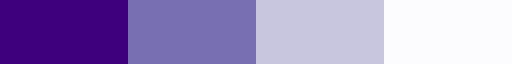

In [22]:
import matplotlib as mpl
#from matplotlib.colors import LinearSegmentedColormap, ListedColormap
cmap = mpl.colormaps['Purples'].resampled(4).reversed()
cmap

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


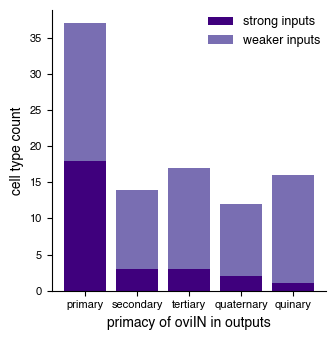

In [23]:
# get hist bins for strong and weak inputs' primacy
strong_counts, strong_bins = np.histogram(strong_testchunk['out_to_ovis_rank'], bins=np.arange(-0.5, 5, 1))
weak_counts, weak_bins = np.histogram(weaker_testchunk['out_to_ovis_rank'], bins=np.arange(-0.5, 5, 1))
better_bins = np.arange(0, 5, 1)

# stacked bar plot
fig, ax = plt.subplots(figsize=(3.465, 3.5))
ax.bar(better_bins, strong_counts, color=cmap([0]))
ax.bar(better_bins, weak_counts, color=cmap([1]), bottom=strong_counts)
ax.set_ylabel('cell type count')
ax.set_xlabel('primacy of oviIN in outputs')
ax.set_xticks(better_bins)
ax.set_xticklabels(['primary', 'secondary', 'tertiary', 'quaternary', 'quinary'])
ax.legend(['strong inputs', 'weaker inputs'])

fig.tight_layout()
plt.savefig('figures/output_primacy_stacked_bars.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Second Plot: Who makes strong recurrent connections with the oviINr?
The primacy dataframe is read in where 'weight' is the cell type weight onto oviIN_R, 'out_to_ovis_weight' is the cell type weight onto both oviINs, and 'out_to_ovis_rank' is the rank of the oviIN cell type within the outputs of a given cell type.

In [24]:
# load the primacy data
primacy = pd.read_csv('data/output_to_oviIN_primacy.csv', index_col=0)

In [25]:
# pull the types in the best rank
primaries = primacy[primacy['out_to_ovis_rank'] == 0]
strong_primaries = primaries[primaries['weight'] >= 100].reset_index(drop=True)
strong_primaries

,type_pre,weight,out_to_ovis_weight,out_to_ovis_rank
0,FS1A,892,1589,0
1,SMP052,361,614,0
2,SMP544,259,358,0
3,LAL134,247,358,0
4,IB017,236,562,0
5,SMP566,203,242,0
6,SMP051,157,273,0
7,SMP386,156,296,0
8,pC1e,148,186,0
9,SMP550,147,445,0


In [26]:
prims_to_oviINr = fetch_simple_connections(oviINr_bodyID, strong_primaries['type_pre'])
prim_types_to_oviINr = prims_to_oviINr[['type_post','weight']].groupby('type_post').sum('weight').reset_index()
prim_types_to_oviINr.sort_values('weight', ascending=False)

,type_post,weight
13,SMP550,375
9,SMP237,225
1,IB017,194
3,SMP007,185
10,SMP386,176
7,SMP153,167
8,SMP179,92
17,pC1e,53
4,SMP051,44
6,SMP112,43


In [27]:
# ratio of weights
ratio_recurr = prim_types_to_oviINr.merge(strong_primaries[['type_pre','weight']], left_on='type_post', right_on='type_pre', suffixes=('_from_oviINr','_to_oviINr'))
ratio_recurr['ratio'] = ratio_recurr['weight_from_oviINr'] / ratio_recurr['weight_to_oviINr']
ratio_recurr.sort_values('ratio', ascending=False)

,type_post,weight_from_oviINr,type_pre,weight_to_oviINr,ratio
13,SMP550,375,SMP550,147,2.551020
3,SMP007,185,SMP007,109,1.697248
9,SMP237,225,SMP237,135,1.666667
7,SMP153,167,SMP153,137,1.218978
10,SMP386,176,SMP386,156,1.128205
8,SMP179,92,SMP179,104,0.884615
1,IB017,194,IB017,236,0.822034
14,SMP551,42,SMP551,102,0.411765
17,pC1e,53,pC1e,148,0.358108
11,SMP520,42,SMP520,125,0.336000


In [28]:
# better way to present ratios
ratio_recurr['recipro_index'] = (abs(ratio_recurr['ratio'] - 1) + abs(ratio_recurr['weight_to_oviINr'] / ratio_recurr['weight_from_oviINr'] - 1))/2
ratio_recurr.sort_values('recipro_index', ascending=True)

,type_post,weight_from_oviINr,type_pre,weight_to_oviINr,ratio,recipro_index
10,SMP386,176,SMP386,156,1.128205,0.120921
8,SMP179,92,SMP179,104,0.884615,0.122910
1,IB017,194,IB017,236,0.822034,0.197230
7,SMP153,167,SMP153,137,1.218978,0.199309
9,SMP237,225,SMP237,135,1.666667,0.533333
3,SMP007,185,SMP007,109,1.697248,0.554029
14,SMP551,42,SMP551,102,0.411765,1.008403
13,SMP550,375,SMP550,147,2.551020,1.079510
17,pC1e,53,pC1e,148,0.358108,1.217172
11,SMP520,42,SMP520,125,0.336000,1.320095


In [29]:
# get oviINr connections in and out
ovi_inputs = fetch_simple_connections(None,oviINr_bodyID)
ovi_outputs = fetch_simple_connections(oviINr_bodyID,None)

In [30]:
# collapse by cell type and sum the weights
ovi_inputs = ovi_inputs[['type_pre','weight']].groupby('type_pre').sum('weight').reset_index()
ovi_outputs = ovi_outputs[['type_post','weight']].groupby('type_post').sum('weight').reset_index()

In [31]:
# merge the two dataframes with outer join
in_out_weights_bytype = ovi_inputs.merge(ovi_outputs, left_on='type_pre', right_on='type_post', how='outer', suffixes=('_to_ovi','_from_ovi')).sort_values('weight_to_ovi', ascending=False).reset_index(drop=True)

# replace NaNs with 0
in_out_weights_bytype = in_out_weights_bytype.fillna(0)
in_out_weights_bytype

,type_pre,weight_to_ovi,type_post,weight_from_ovi
0,FS1A,892.0,FS1A,4.0
1,IB017,370.0,IB017,194.0
2,SMP052,361.0,SMP052,38.0
3,SMP176,299.0,SMP176,11.0
4,FC2B,290.0,FC2B,137.0
...,...,...,...,...
1374,0,0.0,VES082,1.0
1375,0,0.0,aMe13,1.0
1376,0,0.0,aSP-f1A,1.0
1377,0,0.0,aSP-f1B,2.0


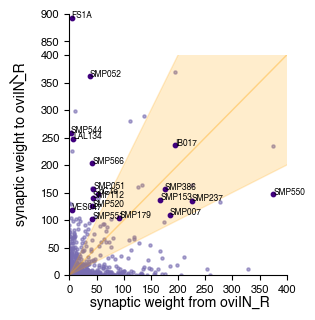

In [32]:
from brokenaxes import brokenaxes
from matplotlib import pyplot as plt

# make a plot of weights against weights
fig = plt.figure(figsize=(3.465,3.5))

ax = brokenaxes(ylims=((0, 400), (825, 900)), hspace=.0)

ax.scatter(in_out_weights_bytype['weight_from_ovi'], in_out_weights_bytype['weight_to_ovi'],  s=5, alpha=0.6, color=cmap([1]))

ax.set_xlabel(' synaptic weight from oviIN_R')
ax.set_ylabel('synaptic weight to oviIN_R')
ax.set_xlim(0, 400)
#ax.set_ylim(0, 900)

# plot a diagonal line
x = np.linspace(0, 900, 100)
y = x
#ax.plot(x, y, color='red')

# recurrence zone
y_hi = x*2
y_lo = x*0.5

y_hi1 = y_hi*2
y_lo1 = y_lo*0.5

#ax.fill_between(x, y, y_hi1, color='orange', alpha=0.2)
#ax.fill_between(x, y_lo1, y, color='orange', alpha=0.2)

ax.fill_between(x, y, y_hi, color='orange', alpha=0.2)
ax.fill_between(x, y_lo, y, color='orange', alpha=0.2)

# add the strong primaries to the mix
ax.scatter(ratio_recurr['weight_from_oviINr'], ratio_recurr['weight_to_oviINr'], color=cmap([0]), s=10)

# annotate the points with cell type names
for i, txt in enumerate(ratio_recurr['type_pre']):
    ax.annotate(txt, (ratio_recurr['weight_from_oviINr'][i], ratio_recurr['weight_to_oviINr'][i]), fontsize=6)

fig.tight_layout()
plt.show()


In [93]:
# save as pdf
fig.savefig('figures/weights_to_from_oviINr.pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
